#### Importing Required Libraries

In [21]:
# importing dependencies
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.io import imread 
from skimage.transform import resize
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Preparing Dataset

In [22]:
# function to prepare the train and test datasets
def prepare_data(data_dir, categories):
    flat_data = []
    target = []
    
    for category in categories:
        class_num = categories.index(category)
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (150,150,3))
            flat_data.append(img_resized.flatten())
            target.append(class_num)
    
    flat_data = np.array(flat_data)
    target = np.array(target)
    
    return flat_data, target

In [23]:
# image categories
categories = ['ball_leather', 'cone', 'sunflower']

# dataset directory
data_dir = 'images'
flat_data, target = prepare_data(data_dir, categories)

#### Dataset Samples

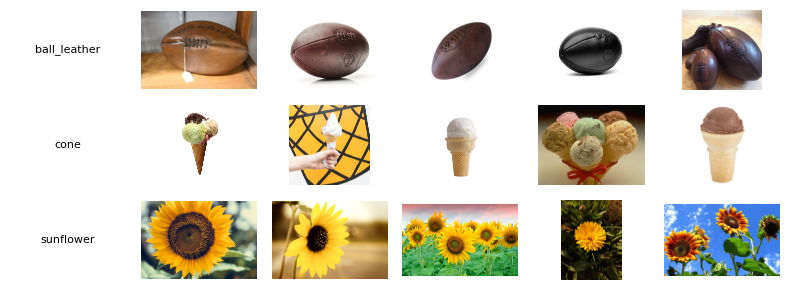

In [24]:
plt.figure(figsize=(8, len(categories)))  

for row_idx, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    images_list = os.listdir(path)[:5]  
    ax = plt.subplot(len(categories), 6, row_idx * 6 + 1)
    ax.axis('off')
    ax.text(0.5, 0.5, category, fontsize=8, ha='center', va='center')
    for img_idx, img_name in enumerate(images_list):
        img_path = os.path.join(path, img_name)
        img = imread(img_path)
        ax = plt.subplot(len(categories), 6, row_idx * 6 + img_idx + 2)
        ax.imshow(img)
        ax.axis('off')

plt.tight_layout()
plt.show()

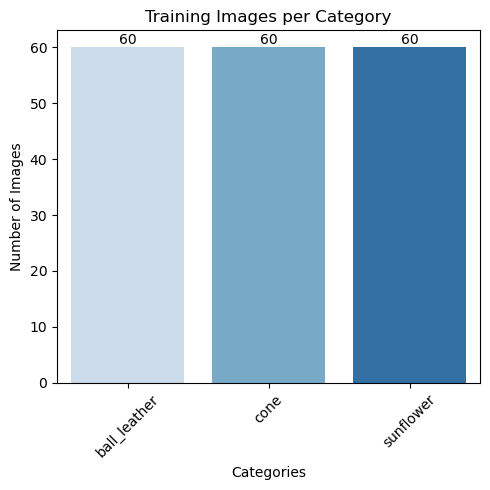

In [25]:
# dataset
unique, count = np.unique(target, return_counts=True)
palette = sns.color_palette("Blues", len(categories)) 

plt.figure(figsize=(5, 5))
ax = sns.barplot(x=categories, y=count, palette=palette, hue=categories, legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Training Images per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Training and Testing Split


In [26]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

#### Building SVM Image Classification Model

In [27]:
# minmaxscaler
scaler = MinMaxScaler()
# scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# paramerter grid
param_grid = [
    {'C':[1,10,100,1000], 'kernel':['linear']},
    {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']}
    ]

# Support Vector Classifier
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

#### Testing and Evaluating the Model

In [29]:
# predictions
y_pred = clf.predict(X_test_scaled)

In [30]:
# accuracy of the SV Classifier
print(f'Accuracy: {accuracy_score(y_pred, y_test):.4f}')

Accuracy: 0.9074


In [31]:
# confusion matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_pred, y_test)}')

Confusion Matrix:
[[19  0  1]
 [ 3 16  1]
 [ 0  0 14]]


In [32]:
# classification report
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       1.00      0.80      0.89        20
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.92      0.91      0.91        54



#### Saving the Model

In [33]:
# save the model using pickel lib
pickle.dump(clf, open('img_model.pkl', 'wb'))
print('Model saved successfully!')

Model saved successfully!
